# Credit Score Analysis

## Overview
The Credit Score Prediction project aims to classify customers into appropriate credit score ranges based on various financial and personal attributes. This classification helps financial institutions assess creditworthiness and make informed lending decisions, ultimately contributing to better risk management.

## Problem Statement
In today's financial landscape, assessing a customer's creditworthiness is crucial for lending decisions. Traditional methods of credit assessment can be slow and subjective. By utilizing machine learning techniques, this project seeks to automate the prediction of credit scores, allowing institutions to quickly evaluate potential borrowers based on their financial behaviors and attributes

## Importing Libraries

In [1]:
# Importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn.impute import KNNImputer

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [6]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',40)
sns.set(style='whitegrid')

## Loading and Combining Datasets


In [10]:
# Load Train Data
train=pd.read_csv('/Users/shubhamchavan21/Downloads/train.csv')
# Load Test Data
test=pd.read_csv('/Users/shubhamchavan21/Downloads/test.csv')

# Combine the training and test datasets into a single DataFrame
data=pd.concat([train,test],ignore_index=True)

## Data Exploration

In [11]:
# Display first 5 rows of combined Data
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
# Display last 5 rows of Data
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN
149999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",22,5,11.5,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847,NaN


In [13]:
# Display shape of Data
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset has 150000 rows and 28 columns.


In [14]:
# Display a summary of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [15]:
# Get summary statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.000000,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.006940,117.069476,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,150000.0,22.623447,129.143006,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,150000.0,71.234907,461.537193,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,150000.0,21.063400,14.860154,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,147000.0,28.529014,194.456058,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,150000.0,32.283309,5.113315,20.000000,28.054731,32.297058,36.487954,50.000000
Total_EMI_per_month,150000.0,1432.513579,8403.759977,0.000000,30.947775,71.280006,166.279555,82398.000000


In [16]:
# Get summary statistics for categorical columns
data.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Month,150000,12,January,12500
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,150000,12501,#F%$D@*&8,8400
Occupation,150000,16,_______,10500
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112


In [17]:
# Show values and value count of columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("**"*20)
    print(data[col].value_counts())
    print("--"*20, '\n')


Column: ID
****************************************
ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: count, Length: 150000, dtype: int64
---------------------------------------- 


Column: Customer_ID
****************************************
Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: count, Length: 12500, dtype: int64
---------------------------------------- 


Column: Month
****************************************
Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
---------------------------------------- 


Column: Nam

#### Key Insight:

1. ID and Customer_ID ID: There are 150,000 unique IDs, indicating that each entry is distinct. This suggests no duplicate records in this column. Customer_ID: Each customer appears 12 times, which likely corresponds to monthly records across a year, suggesting a well-structured dataset for longitudinal analysis.

2. Month Each month from January to December has an equal number of records (12,500 each), indicating a balanced distribution of data across the year. This uniformity is essential for time series analysis.

3. Age Contain higher values which are unrelaistic.may indicate d presence of these outliers, suggesting a need to be removed.

4. SSN A significant number of records have non-standard Social Security Numbers (e.g., #F%$D@*&8), suggesting a need to be removed.

5. Occupation A large number of records have no specified occupation (___ appears 10,500 times),suggesting a need for data cleansing.

6. Annual Income The annual income column contains many unique values, with some high discrepancies,The presence of these outliers could indicate either errors in data entry.

7. Changed Credit Limit The frequent occurrence of _ indicates missing or invalid data in this column,suggesting a need for data cleansing.

8. Monthly Balance The presence of extremely large negative values (-333333333333333333333333333) may indicate data entry error,suggesting a need for data cleansing

#### Conclusion:

1. Several columns in the dataset are formatted incorrectly and need to be standardized. (ID, Customer_ID, Age, Annual_Income,Num_of_Loan, Num_of_Delayed_Payment , Changed_Credit_Limit , Outstanding_Debt, Credit_History_Age,Amount_invested_monthly, Monthly_Balance)
2. There are numerous values indicating potential errors or outliers, necessitating thorough review and correction to enhance data quality.

## Data Cleaning

In [44]:
def text_cleaning(data):
    """
    Cleans a given text data by:
    - Returning the data as-is if it is NaN or not a string.
    - Otherwise, converting the data to a string and removing unwanted characters
      such as leading/trailing underscores ('_'), spaces (' '), commas (','), and double quotes ('"').

    Args:
        data: The input data to clean, which can be of any type.

    Returns:
        The cleaned string if the input is a valid string, or the original data if it is NaN or not a string.
    """
    if data is np.NaN or not isinstance(data, str):  # Check if data is NaN or not a string.
        return data  # Return the data without modification.
    else:
        return str(data).strip('_ ,"')  # Convert to string and remove specific leading/trailing characters.

In [36]:
# Apply the text_cleaning function to every element in the DataFrame
# and replace invalid values with NaN.
data = data.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [37]:
# Check what columns are wrong formated as 'object'
object_columns = data.select_dtypes(include='object').columns
print(f"Columns with object dtype: {object_columns}")


Columns with object dtype: Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


## Data Type Conversion

In [38]:
# Ensure proper formatting of numerical columns by converting them to their intended data types

data['Age']                     = data.Age.astype(int)                          # Convert to integer for age
data['Num_of_Loan']             = data.Num_of_Loan.astype(int)                  # Convert to integer for loan count
data['Num_Bank_Accounts']       = data.Num_Bank_Accounts.astype(int)            # Convert to integer for account count
data['Annual_Income']           = data.Annual_Income.astype(float)              # Convert to float for precise income values
data['Changed_Credit_Limit']    = data.Changed_Credit_Limit.astype(float)       # Convert to float for credit limit changes
data['Outstanding_Debt']        = data.Outstanding_Debt.astype(float)           # Convert to float for outstanding debt
data['Amount_invested_monthly'] = data.Amount_invested_monthly.astype(float)    # Convert to float for monthly investments
data['Monthly_Balance']         = data.Monthly_Balance.astype(float)            # Convert to float for monthly balances
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'],  # Convert to numeric for delayed payment count
                                               errors='coerce')

## Visualizing Numerical Distributions

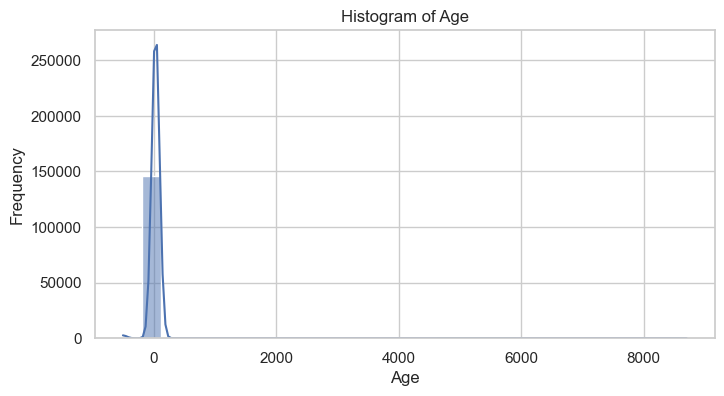

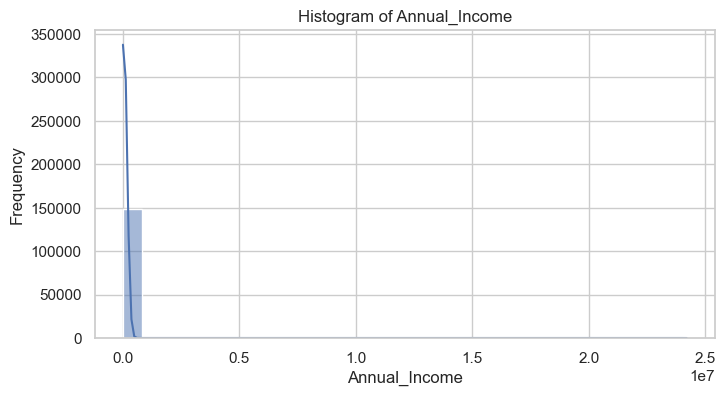

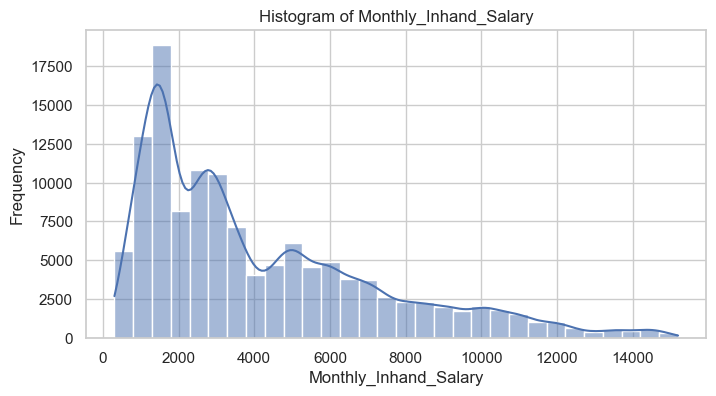

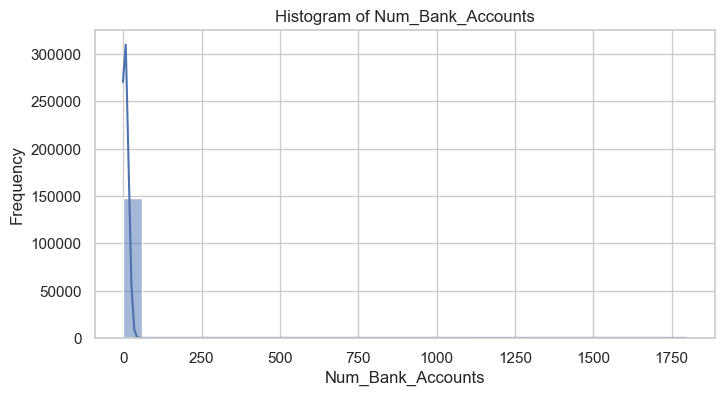

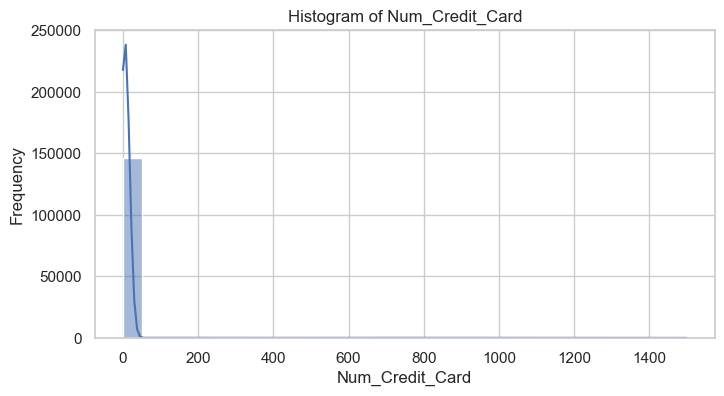

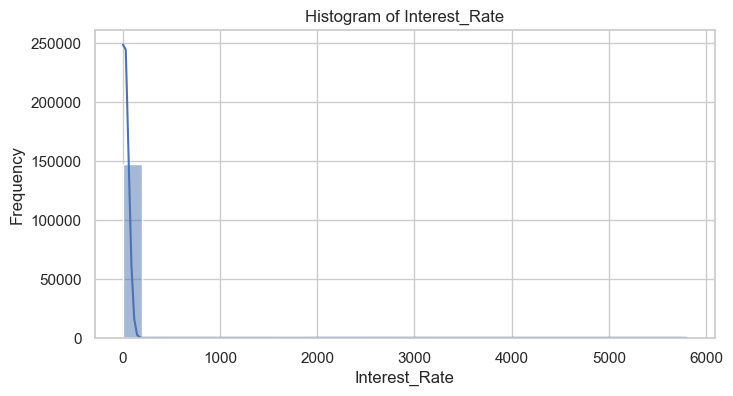

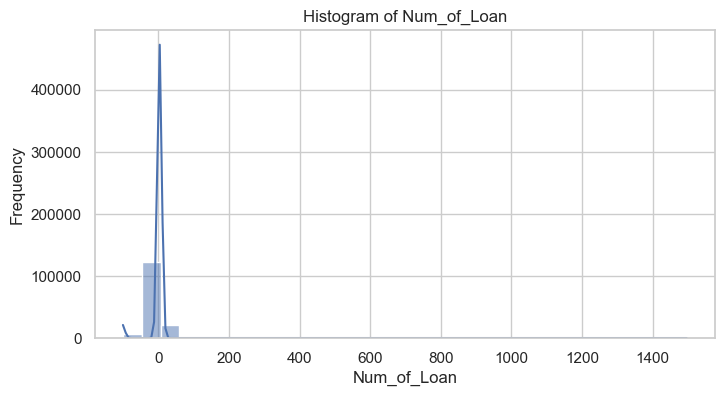

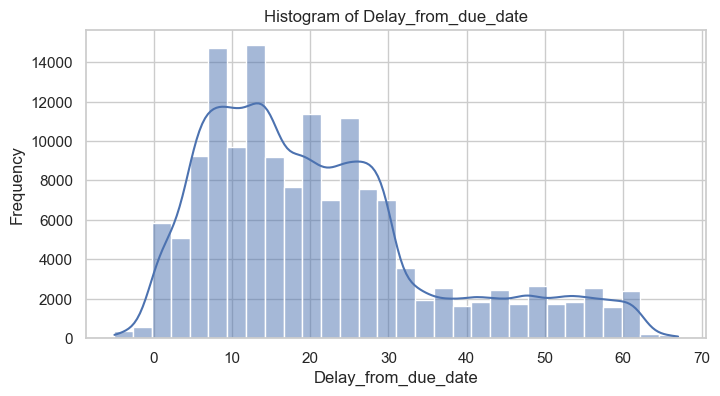

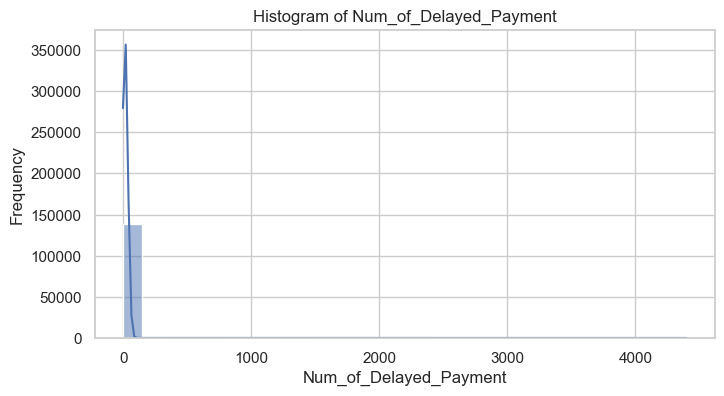

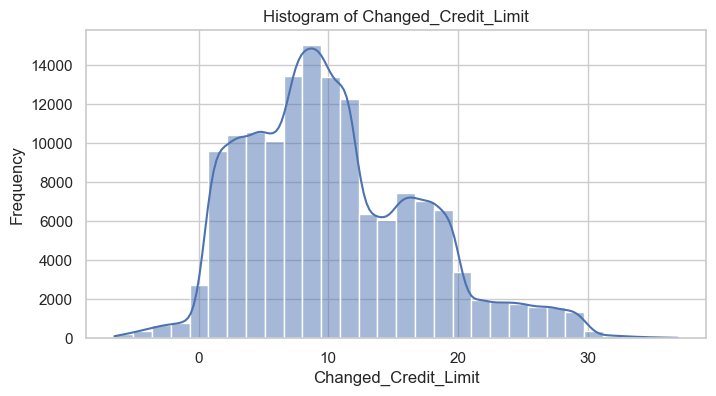

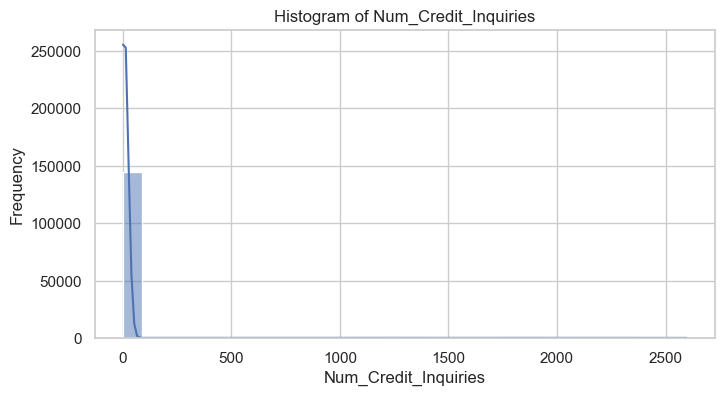

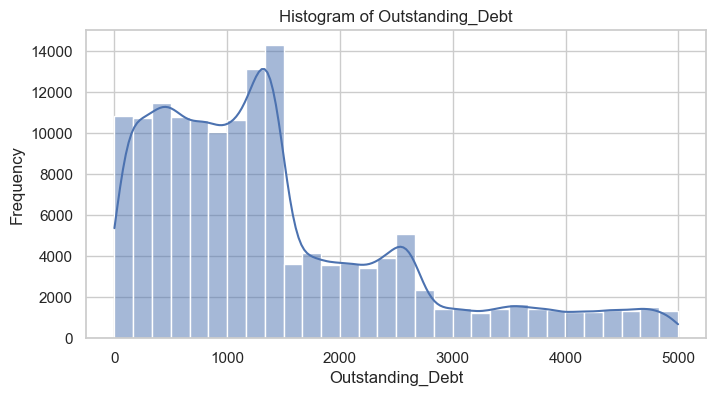

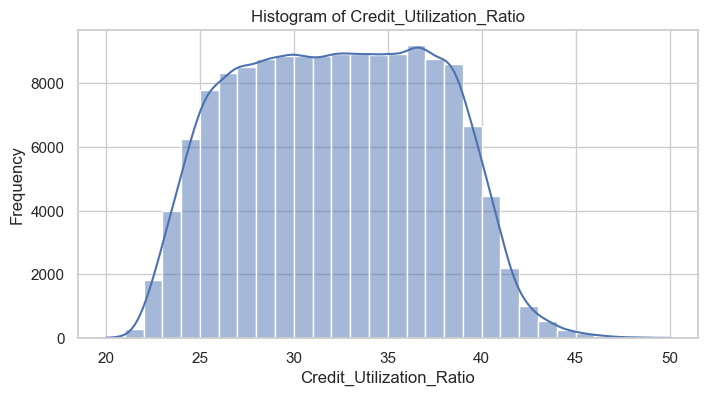

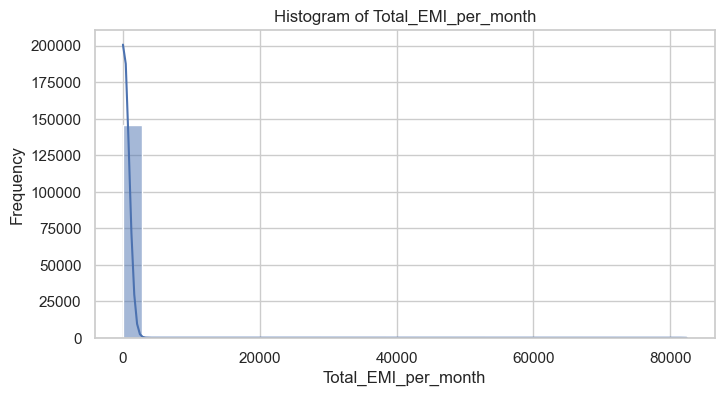

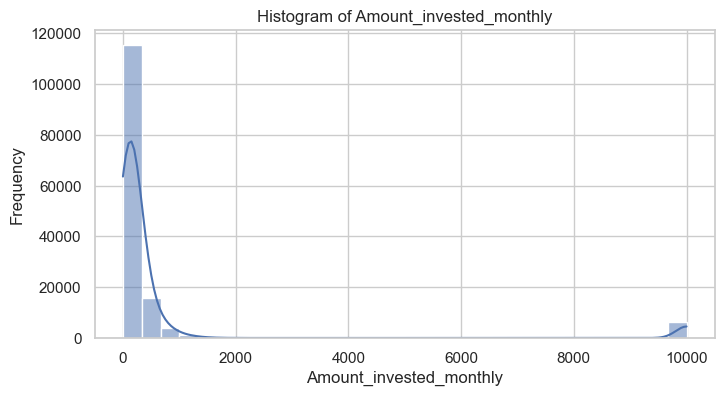

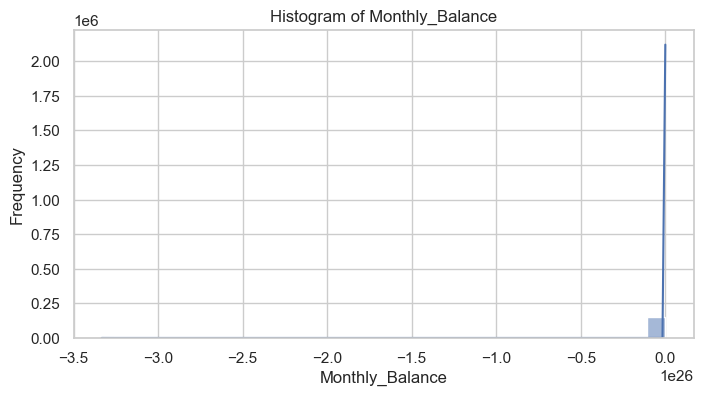

In [39]:
# Select numeric columns from the DataFrame
numeric_columns = data.select_dtypes(include='number').columns

# Iterate over each numeric column
for col in numeric_columns:
    # Create a new figure for each column with specified size
    plt.figure(figsize=(8, 4))

    # Create a histogram with a kernel density estimate (KDE) for the current numeric column
    sns.histplot(data[col], bins=30, kde=True)

    # Set the title of the plot to indicate which column is being visualized
    plt.title(f'Histogram of {col}')

    # Label the x-axis with the name of the numeric column
    plt.xlabel(col)

    # Label the y-axis with 'Frequency' to represent the count of occurrences
    plt.ylabel('Frequency')
    # Display the plot
    plt.show()

#### Observations:

1. monthly in-hand salary: The histogram has a right-skewed distribution, meaning that most of the salaries are lower.


2. delay from the due date: The histogram has a right-skewed distribution, meaning that most of the delays are shorter. The peak of the histogram is around 10 days, which means that most of the delays are between 0 and 10 days. There are also a few delays that are longer than 60 days.


3. changed credit limit: The histogram has a right-skewed distribution, meaning that most of the changes in credit limits are negative. The peak of the histogram is around 0, which means that most of the changes in credit limits are between -10 and 0. There are also a few changes in credit limits that are positive.


4. outstanding debt: The histogram has a right-skewed distribution, meaning that most of the outstanding debt amounts are lower. The peak of the histogram is around 0, which means that most of the outstanding debt amounts are between 0 and 1000. There are also a few outstanding debt amounts that are higher than 4000.


5. credit utilization ratio: The histogram has a bell-shaped distribution, meaning that most of the credit utilization ratios are around 30%. There are also a few credit utilization ratios that are higher than 40%

## Visualizing Categorical Distributions

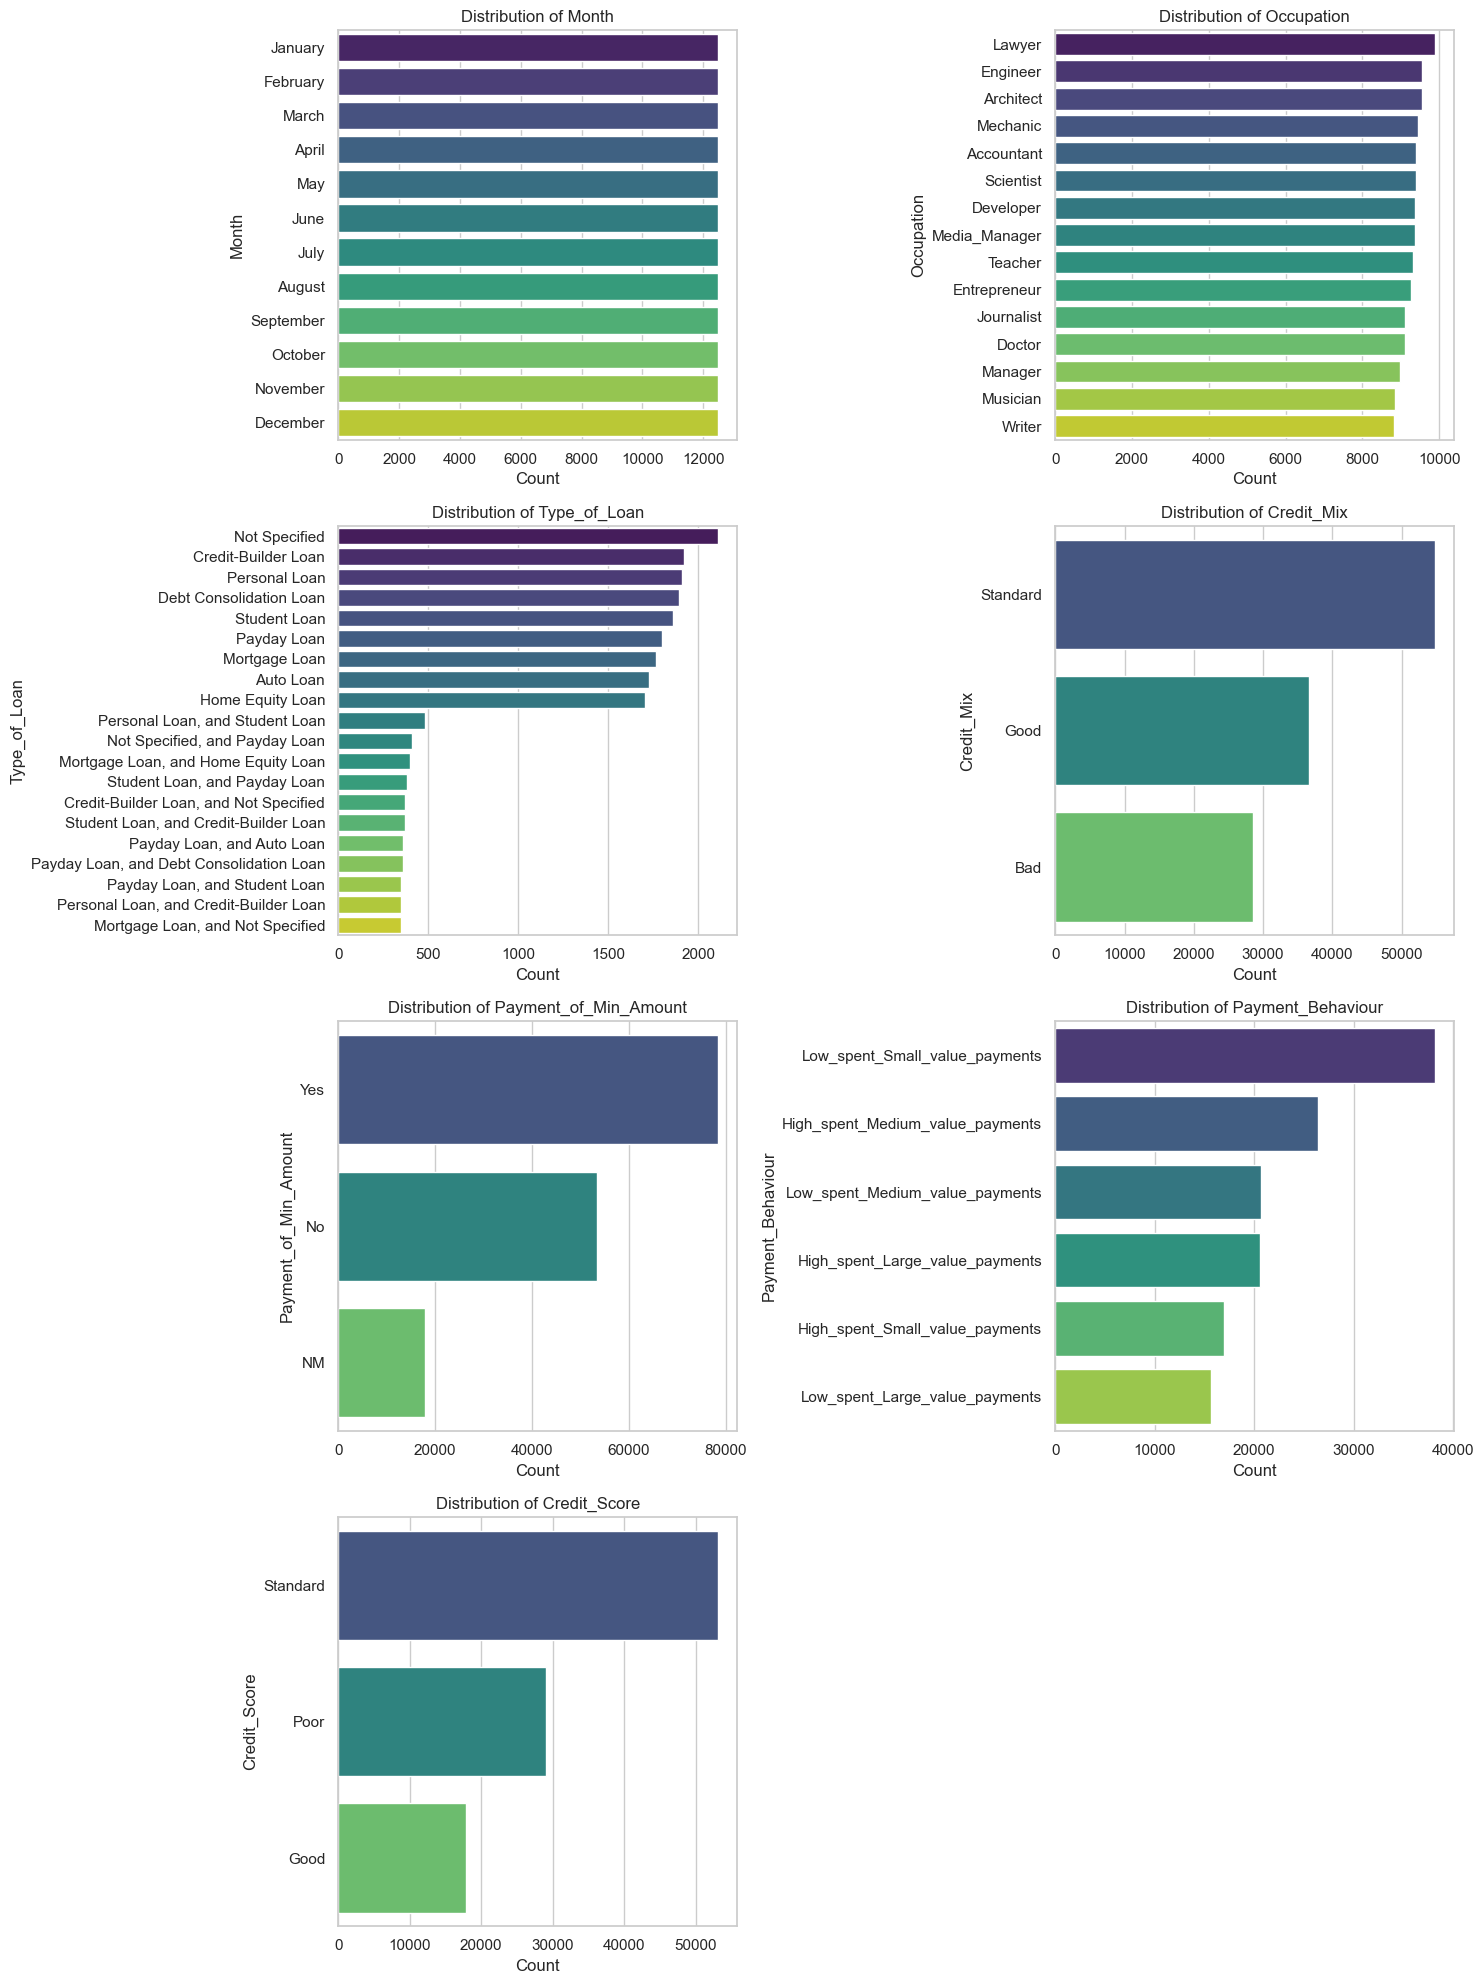

In [40]:
# Specify categorical columns
categorical_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
                    'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Determine grid layout
n_cols = 2
n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division for rows

# Set up the figure size
plt.figure(figsize=(15, 5 * n_rows))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = data[col].value_counts().index[:min(20, len(data[col].unique()))]  # Top 10 or fewer categories
    sns.countplot(y=col, data=data, order=order, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
# Adjust layout for readability
plt.tight_layout()
plt.show()

### Observations:

1. Month:
- Is equally distibuted
2. Occupation:
- The most common occupations are "Lawyer" and "Engineer"
- "Media Manager", "Journalist", and "Musician" are the least common occupations represented in the data.
3. Type of Loan:
- "Not Specified","Personal Loan","Student Loan","Credit Builder Loan" and "Home Equity Loan" are the least common or main types of loans.
4. Credit Mix:
- "Standard" is the most common credit mix
- "Bad" is the least common credit mix.
5. Payment of Min Amount:
- Most customers pay the minimum amount due.
6. Payment Behaviour:
- The most common payment behavior is "Low spent, Small value payments".
- "High spent, Large value payments" and "Low spent, Large value payments" are the least common payment behaviors.
7. Credit Score:
- "Standard" is the most common credit score.
- "Poor" is the least common credit score.
-this is the target and it is imbalanced, will solve this before traing models

### Conclusion:

1. The distribution of credit scores is skewed towards "Standard". This suggests that most customers have good credit scores.
2. The most common payment behavior is "Low spent, Small value payments". This suggests that most customers make small payments throughout the month.
3. The most common credit mix is "Standard". This suggests that most customers have a good mix of credit products and are managing them responsibly.
4. The data suggests that most customers are responsible borrowers with good credit scores. They tend to make small payments throughout the month and have a mix of credit products.

## Feature Engineering

In [46]:
# Check number of Loan types in the data
data.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                         2112
Credit-Builder Loan                                                                                                                   1920
Personal Loan                                                                                                                         1908
Debt Consolidation Loan                                                                                                               1896
Student Loan                                                                                                                          1860
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                12
Payday Loan, M

#### Observation:

The 'Type_of_loan' column contains a wide variety of values, including many that are repeated and some that feature multiple entries a total of (6260) type. To streamline the dataset, I have decided to map these values to the most common and significant categories.

In [47]:
# Define the mapping for loan types
mapping_priority = [
    'not specified',
    'credit-builder loan',
    'personal loan',
    'consolidation loan',
    'student loan'
]

# Function to select a single value from multi-value loan types
def map_loan_types(loan_types):
    if pd.isna(loan_types):
        return loan_types  # Return NaN as is
    # Split by commas and convert to lowercase
    loans = re.split(r',| and ', loan_types.lower())
    # Find the first matching value based on mapping priority
    for priority in mapping_priority:
        if any(priority in loan.strip() for loan in loans):
            return priority
    return 'other'  # Fallback value if no mapping is found

# Apply the mapping function to the original column
data['Type_of_Loan'] = data['Type_of_Loan'].apply(map_loan_types)

In [48]:
# Check unique Values after mapping
data['Type_of_Loan'].unique()

array(['credit-builder loan', 'not specified', nan, 'personal loan',
       'other', 'consolidation loan', 'student loan'], dtype=object)

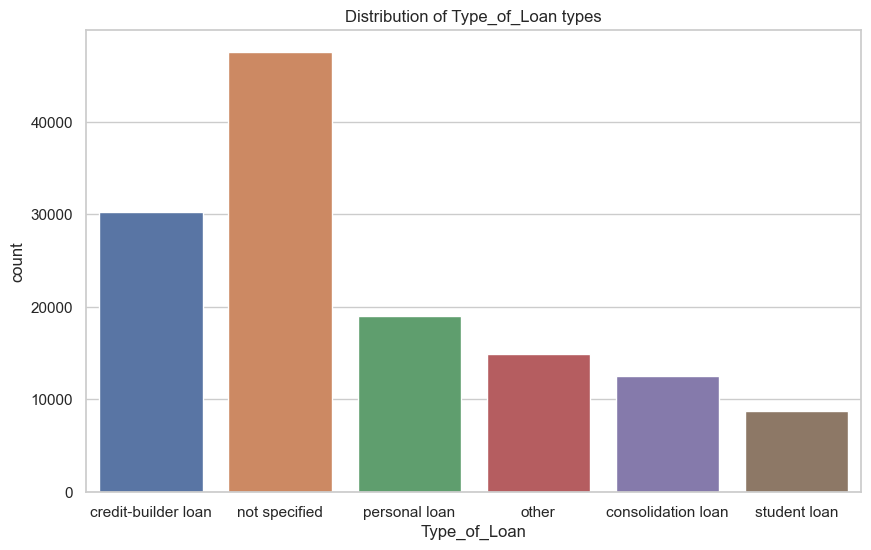

In [49]:
# Analyze distribution of 'Type_of_Loan' after mapping
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type_of_Loan')
plt.title('Distribution of Type_of_Loan types')
plt.show()


## Handling Missing Values

In [50]:
# Check for missing values in the dataset
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

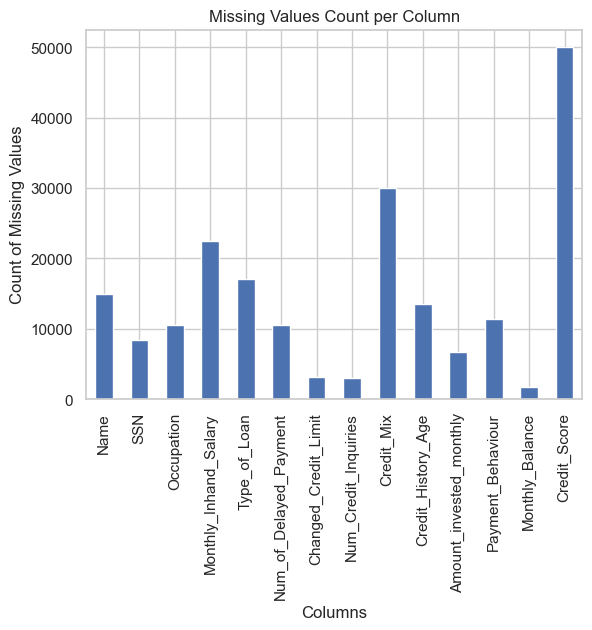

In [51]:
# Plot count of missing values
missing_counts = data.isnull().sum()
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.show()

### Key Observations:¶
#### Columns with Complete Data:

The columns[ ID, Customer_ID, Month, Age, Annual_Income, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, and Total_EMI_per_month ]contain no missing values.

#### Columns with Significant Missing Data:

The 'Credit_Mix' column has the highest count of missing values, with 30,000 entries missing. This indicates a need for attention, as this feature may play a crucial role in credit scoring. The 'Type_of_Loan' column also has a high number of missing values (17,112), which could affect the analysis of loan types.

Other columns with considerable missing values include 'Name' (15,000), 'Occupation' (10,500), 'Num_of_Delayed_Payment' (10,500), 'Payment_Behaviour' (11,400), and 'Credit_History_Age' (13,500).

#### Columns with Moderate Missing Data:

The 'Changed_Credit_Limit' column has 3,150 missing values, while the 'Num_Credit_Inquiries' column has 3,000 missing entries. Addressing these may also be necessary to ensure a complete dataset.



In [53]:
# As Customer_ID is not null, we can use it as a unique identifier for our data.
# This ensures that each Customer in the dataset can be uniquely identified by the Customer_ID.
# Setting Customer_ID as the index
data = data.set_index('Customer_ID')

Applied forward filling after grouping the data by Customer_ID, as it was observed that each customer had data spanning 12 months, with multiple rows and similar values in most columns. This approach effectively addresses the null values and simplifies the data cleaning process.

In [54]:
# Group by 'Customer_ID' and apply ffill
# Exclude 'Credit_History_Age' from forward-filling.
exclude_column = 'Credit_History_Age'

# Separate the excluded column for later use.
excluded_data = data[exclude_column]

# Drop the excluded column and reset the index
data = data.drop(columns=[exclude_column]).reset_index()

# Apply forward-fill to the remaining columns grouped by 'Customer_ID'.
# This fills NaN values with the last valid observation for each customer.
data = data.groupby('Customer_ID').apply(lambda group: group.fillna(method='ffill')).reset_index(drop=True)

# Add the excluded column back
excluded_data = excluded_data.reset_index(drop=True)
data[exclude_column] = excluded_data

# Optional: Set the index back to the original
data.set_index('Customer_ID', inplace=True)

# Show the result
data.head(12)

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,0x1628a,January,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,25.0,1.63,10.0,Bad,1562.91,26.612093,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,Standard,22 Years and 1 Months
CUS_0x1000,0x1628b,February,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,23.0,1.63,11.0,Bad,1562.91,29.439759,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,Poor,NaN
CUS_0x1000,0x1628c,March,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,28.0,1.63,11.0,Bad,1562.91,38.285928,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,Poor,22 Years and 3 Months
CUS_0x1000,0x1628d,April,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,64,25.0,1.63,11.0,Bad,1562.91,32.843081,Yes,42.94109,87.909909,High_spent_Medium_value_payments,419.765167,Poor,22 Years and 4 Months
CUS_0x1000,0x1628e,May,Alistair Barrf,17,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,67,25.0,2.63,11.0,Bad,1562.91,32.330508,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor,22 Years and 5 Months
CUS_0x1000,0x1628f,June,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,23.0,1.63,11.0,Bad,1562.91,40.082272,Yes,42.94109,114.802401,High_spent_Small_value_payments,372.872676,Poor,22 Years and 6 Months
CUS_0x1000,0x16290,July,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,62,25.0,2.63,11.0,Bad,1562.91,38.149539,Yes,42.94109,266.597160,Low_spent_Small_value_payments,251.077916,Poor,22 Years and 7 Months
CUS_0x1000,0x16291,August,Alistair Barrf,18,913-74-1218,Lawyer,30625.94,2706.161667,6,5,27,2,credit-builder loan,57,26.0,1.63,11.0,Bad,1562.91,30.077191,Yes,42.94109,77.314276,High_spent_Medium_value_payments,400.360801,Poor,NaN
CUS_0x1000,0x16292,September,Alistair Barrf,18,913-74-1218,Lawyer,17188404.00,2706.161667,6,5,27,2,credit-builder loan,65,25.0,1.63,11.0,Bad,1562.91,27.565767,Yes,42.94109,156.284898,Low_spent_Large_value_payments,341.390178,Poor,26 Years and 7 Months


In [56]:
# Function to convert Credit_History_Age to a start date in YYYY-MM-DD format
def convert_to_start_date(age_str):
   # Check if the input is NaN; if so, return it unchanged
    if pd.isna(age_str):
        return age_str

  # Split the string into parts based on the word 'and' to separate years and months
    parts = age_str.split('and')
    years = months = 0        # Initialize years and months to 0


  # Iterate through each part to extract years and months
    for part in parts:
        part = part.strip()      # Remove leading and trailing whitespace
        if 'Year' in part:
            years = int(part.split()[0])       # Extract the number of years
        elif 'Month' in part:
            months = int(part.split()[0])      # Extract the number of months
 # Calculate total months
    total_months = years * 12 + months
    # Calculate the start date
    start_date = datetime.now() - pd.DateOffset(months=total_months)
    # Format the date to YYYY-MM-DD and return it
    return start_date.strftime('%Y-%m-%d')


# Apply the function to create a new start date column
data['Credit_History_Age']=data['Credit_History_Age'].apply(convert_to_start_date)

Interpolation: is a method used to estimate missing values by leveraging the available data. By applying linear interpolation to the ordinal values, creating a more seamless transition between existing data points, filling in the gaps where data is missing. This helps in maintaining the continuity of the 'Credit_History_Age' data.

In [57]:
#  Convert 'Credit_History_Age' to datetime format, keeping NaN values as NaT (Not a Time)
data['Credit_History_Age'] = pd.to_datetime(data['Credit_History_Age'], errors='coerce')

# Convert datetime to ordinal values for interpolation
data['Ordinal'] = data['Credit_History_Age'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)

# Perform linear interpolation on ordinal values to fill NaN entries
data['Ordinal'] = data['Ordinal'].interpolate(method='linear')

# Convert interpolated ordinal values back to datetime format; NaN entries remain as NaT
data['Credit_History_Age'] = data['Ordinal'].apply(lambda x: datetime.fromordinal(int(x)) if pd.notnull(x) else pd.NaT)

# Drop the helper column used for interpolation
data.drop(columns=['Ordinal'], inplace=True)

In [58]:
# Check if missing values are removed
data.isna().sum()

ID                              0
Month                           0
Name                         1370
Age                             0
SSN                           729
Occupation                    897
Annual_Income                   0
Monthly_Inhand_Salary        2196
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment        927
Changed_Credit_Limit          239
Num_Credit_Inquiries          241
Credit_Mix                   3133
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly       591
Payment_Behaviour             991
Monthly_Balance               148
Credit_Score                    0
Credit_History_Age              0
dtype: int64

Used Backword fill (bfill) for the Occupation column because I noticed that some missing values were present at the End or middle of each Customer_ID group. This method fills these missing entries with the next non-null value within the same group, which helps to maintain continuity and ensures that the data reflects the last known information for each customer.

In [59]:
# Group by 'Customer_ID' and apply bfill to 'Occupation' column.
data['Occupation'] = data.groupby(data.index)['Occupation'].transform(lambda group: group.fillna(method='bfill'))

#### KNN (K-Nearest Neighbors) imputation
is a method used to fill in missing values in a dataset by leveraging the similarity between instances (rows) based on their feature values.
KNN imputation allows a more tailored and effective approach to handling missing data, ensuring that the resulting dataset retains its integrity and reflects meaningful relationships between features.

In [62]:
"""
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    data (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 11.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """
def knn_impute(data, column_name, n_neighbors=5):
    # Extract the column to be imputed
    column_to_impute = data[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    data[column_name] = column_imputed
    return data

### Applying KNN imputation

Here’s why each of these columns might benefit from KNN imputation:

**Monthly_Balance**: This is a continuous financial metric that can be influenced by various factors such as income and spending habits. Imputing missing values using KNN can provide a more accurate estimate based on similar customers' financial behavior.

**Monthly_Inhand_Salary**: As an important indicator of a customer's financial capacity, missing values in salary data can significantly impact the analysis. KNN imputation can help fill in these gaps by looking at the financial profiles of similar customers.

**Num_of_Delayed_Payment**: This column reflects payment behavior, which can vary based on a customer’s financial health. KNN imputation can be particularly useful here, as it can infer missing values based on the payment histories of comparable customers.

**Num_Credit_Inquiries**: This column indicates how often a customer has applied for credit, which can correlate with their creditworthiness. Imputing missing values with KNN allows you to take into account the inquiry patterns of similar customers.

**Changed_Credit_Limit**: Changes in credit limits can be influenced by various factors, including income and payment history. KNN imputation can provide estimates based on the credit behaviors of similar customers, ensuring that the imputed values make sense in context.

**Amount_invested_monthly**: This column may reflect a customer’s investment behavior, which can also depend on income and financial stability. KNN imputation can help fill in missing values based on similar investment patterns observed in other customers. italicized text

**Benefits of This Approach**:

Preserving Relationships:

- By using KNN imputation for these specific columns, I preserve the relationships among the features, as missing values are filled based on actual customer behavior rather than arbitrary values.

Data Integrity:

- It helps maintain the integrity of dataset, allowing making more reliable analyses and predictions.

- Enhanced Predictive Power:

- Imputing these key financial and behavioral metrics can improve the overall performance of predictive models.

In [63]:
# Apply KNN imputation on specific columns to fill missing values
data = knn_impute(data, 'Monthly_Balance')
data = knn_impute(data, 'Monthly_Inhand_Salary')
data = knn_impute(data, 'Num_of_Delayed_Payment')
data = knn_impute(data, 'Num_Credit_Inquiries')
data = knn_impute(data, 'Changed_Credit_Limit')
data = knn_impute(data,'Amount_invested_monthly')

Filling missing values in 'Payment_Behaviour' based on the mode within each Customer_ID group, ensures that the imputed values reflect the most common behavior of customer.

In [64]:
# Fill missing values in 'Payment_Behaviour' within each Customer_ID group
data['Payment_Behaviour'] = (
    data.groupby('Customer_ID')['Payment_Behaviour']  # Group the data by 'Customer_ID'
    .transform(lambda group: group.fillna(group.mode()[0] if not group.mode().empty else 'Unknown'))
    # Fill NaN values with the mode of the group (most frequent value)
)

In [65]:
# Fill categorical columns
# Forward filling is useful in this context as
# customer's 'credit mix' doesn't change frequently
data['Credit_Mix'].fillna(method='ffill', inplace=True)

# customer's 'Type_of_Loan mix' doesn't change frequently
data['Type_of_Loan'].fillna(method='ffill', inplace=True)
# Check again if missing values are removed
data.isna().sum()

ID                             0
Month                          0
Name                        1370
Age                            0
SSN                          729
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_History_Age             0
dtype: int64

## Reasons for Removing Negative Values:
1. Data Integrity: Negative values in columns such as Monthly_Balance, Num_of_Loan,or Age may indicate data entry errors, inconsistencies, or invalid records. Replacing these values helps maintain the integrity of the dataset.
2. Analysis Accuracy: Many statistical analyses and machine learning models, assume non-negative values for certain features. Retaining negative values could skew results or lead to errors during analysis.
3. Domain-Specific Validity: In a financial context, negative values may not make sense.For instance, a negative Monthly_Balance or Changed_Credit_Limit could be logically inconsistent, as these metrics typically represent positive quantities.


To handle this, we replace negative values with 0 to correct anomalies while preserving the dataset for further analysis

In [66]:
# Change format of some float , object values that supposed to be Integers
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].astype(int)

In [67]:
# List of selected columns to check for negative values
selected_columns = [
    'Delay_from_due_date',
    'Changed_Credit_Limit',
    'Num_Bank_Accounts',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Monthly_Balance',
    'Age'
]

# Iterate over each column in the selected columns
for column in selected_columns:
    # Replace negative values with 0 in the current column
    data[column] = data[column].apply(lambda x: max(x, 0))

In [68]:
# Check Data shape to make sure no values were removed
data.shape

(150000, 27)

In [69]:
# Check for duplicate rows in the DataFrame
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [70]:
# Get summary statistics for numerical columns after Data Cleaning
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,150000.0,114.83794,0.0,25.0,33.0,42.0,8698.0,681.677376
Annual_Income,150000.0,173055.202531,7005.93,19455.49,37578.61,72796.905,24198062.0,1404214.602713
Monthly_Inhand_Salary,150000.0,4191.468576,303.645417,1637.139167,3142.505,5909.58,15204.633333,3159.422408
Num_Bank_Accounts,150000.0,17.007187,0.0,3.0,6.0,7.0,1798.0,117.069439
Num_Credit_Card,150000.0,22.623447,0.0,4.0,5.0,7.0,1499.0,129.143006
Interest_Rate,150000.0,71.234907,1.0,8.0,13.0,20.0,5799.0,461.537193
Num_of_Loan,150000.0,7.041093,0.0,1.0,3.0,5.0,1496.0,60.455425
Delay_from_due_date,150000.0,21.07686,0.0,10.0,18.0,28.0,67.0,14.839729
Num_of_Delayed_Payment,150000.0,30.787067,0.0,9.0,14.0,18.0,4399.0,223.175656
Changed_Credit_Limit,150000.0,10.425357,0.0,5.34,9.41,14.83,36.97,6.711652


In [71]:
# Get summary statistics for categorical columns after Data Cleaning
data.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1628a,1
Month,150000,12,January,12500
Name,148630,10128,Jessicad,72
SSN,149271,12500,913-74-1218,12
Occupation,150000,15,Lawyer,10644
Type_of_Loan,150000,6,not specified,53952
Credit_Mix,150000,3,Standard,68762
Payment_of_Min_Amount,150000,3,Yes,78484
Payment_Behaviour,150000,6,Low_spent_Small_value_payments,41334
Credit_Score,150000,3,Standard,79114


## General Observations

1. Outliers and Skewness:
Variables like Age, Annual_Income, Num_Bank_Accounts, Num_Credit_Card, and Interest_Rate have unusually high maximum values compared to their means and interquartile ranges. This indicates significant outliers

**Insights by Feature**

1. Age:

- Mean: 115.8, but the max of 8698 is highly unrealistic. 
- Insights: Outliers should be capped or removed.

2. Annual_Income:

- Wide range from 7,005.93 to 24,198,062.0 with a very high std of 1,406,204.32.

- Insights: -The data is likely highly skewed; log transformation could help normalize it, -high-income outliers.

3. Monthly_Inhand_Salary:

- Relatively consistent distribution, but outliers should be checked.

4. Num_Bank_Accounts and Num_Credit_Card:

- Extreme maximum values (e.g., 1798 bank accounts and 1499 credit cards).

- Insights: -Outliers should be capped or removed. -Median values (6 for credit cards, 6 for bank accounts) suggest most customers have reasonable values.

5. Interest_Rate:

- Mean of 71.13 but a maximum of 5797, which seems unrealistic.

- Insights: Outliers should be capped or removed.

6. Num_of_Loan:

- Median value is 3, but the maximum is 1496.

- Insights: Outliers should be capped or removed.

7. Delay_from_due_date and Num_of_Delayed_Payment:

- These features show realistic ranges

8. Changed_Credit_Limit:

- Mean of 10.65 with a maximum of 36.65.

- Insights: a fairly consistent feature.

9. Outstanding_Debt:

- Mean of 1439.31 and max of 4998.07, showing reasonable variability.

- Insights: The data is likely highly skewed; log transformation could help normalize it.

10. Credit_Utilization_Ratio: Range appears plausible (20% to 50%).

11. Total_EMI_per_month: Median of 71.32, but a max of 82,398 shows significant outliers.

- Insights: Outliers should be capped to prevent skewing the model.

12. Monthly_Balance: Mean of 400.92, with a reasonable max of 1606.52.

- Insights: Consistent feature.

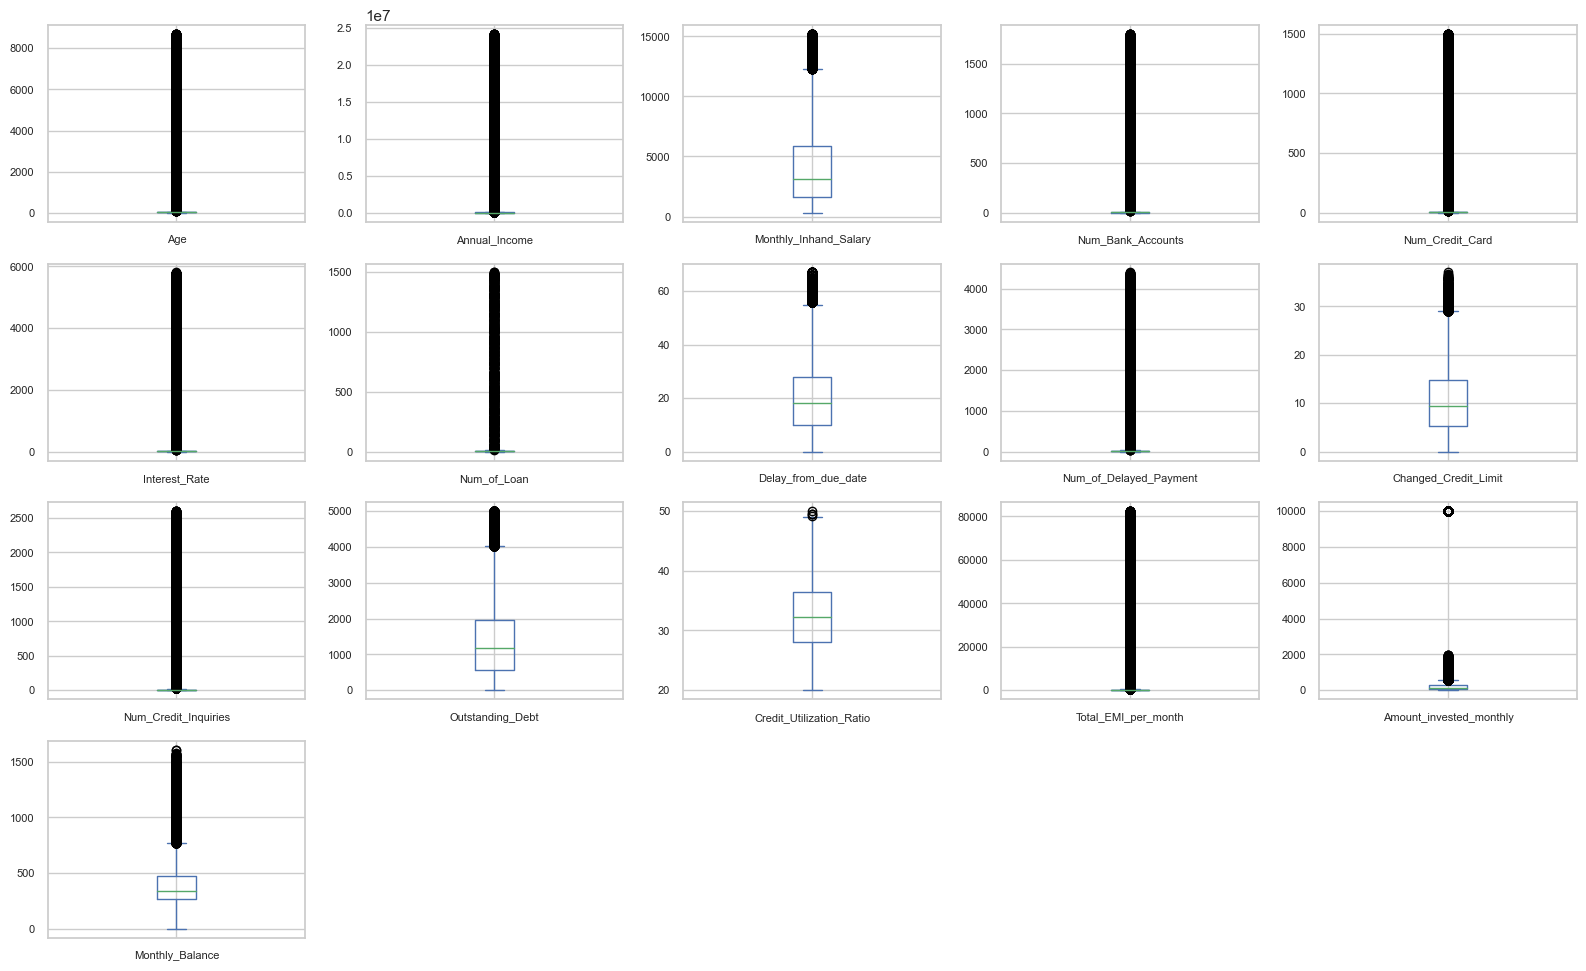

In [72]:
# exclude categorical data and creat a new datafarme to check the outliers
data_numric=data.select_dtypes(exclude='object')
#boxploting each feature
fig, axes = plt.subplots(figsize=(16, 12))
data_numric.plot(kind='box', subplots=True, layout=(5, 5), ax=axes, fontsize=8)
fig.tight_layout(pad=1.0)
plt.show()

## Checking and Removing Outliers

capping outliers is a practical approach that balances the need for robust statistical analysis while retaining the richness of the dataset. It allows for a more nuanced treatment of extreme values, ultimately leading to more reliable insights.